### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jahdovanterpool/Downloads/datasets-2/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Exploring the data (EDA)

In [3]:
df.info()
print('\n','-'* 100,'\n')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

 ---------------------------------------------------------------------------------------------------- 



,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


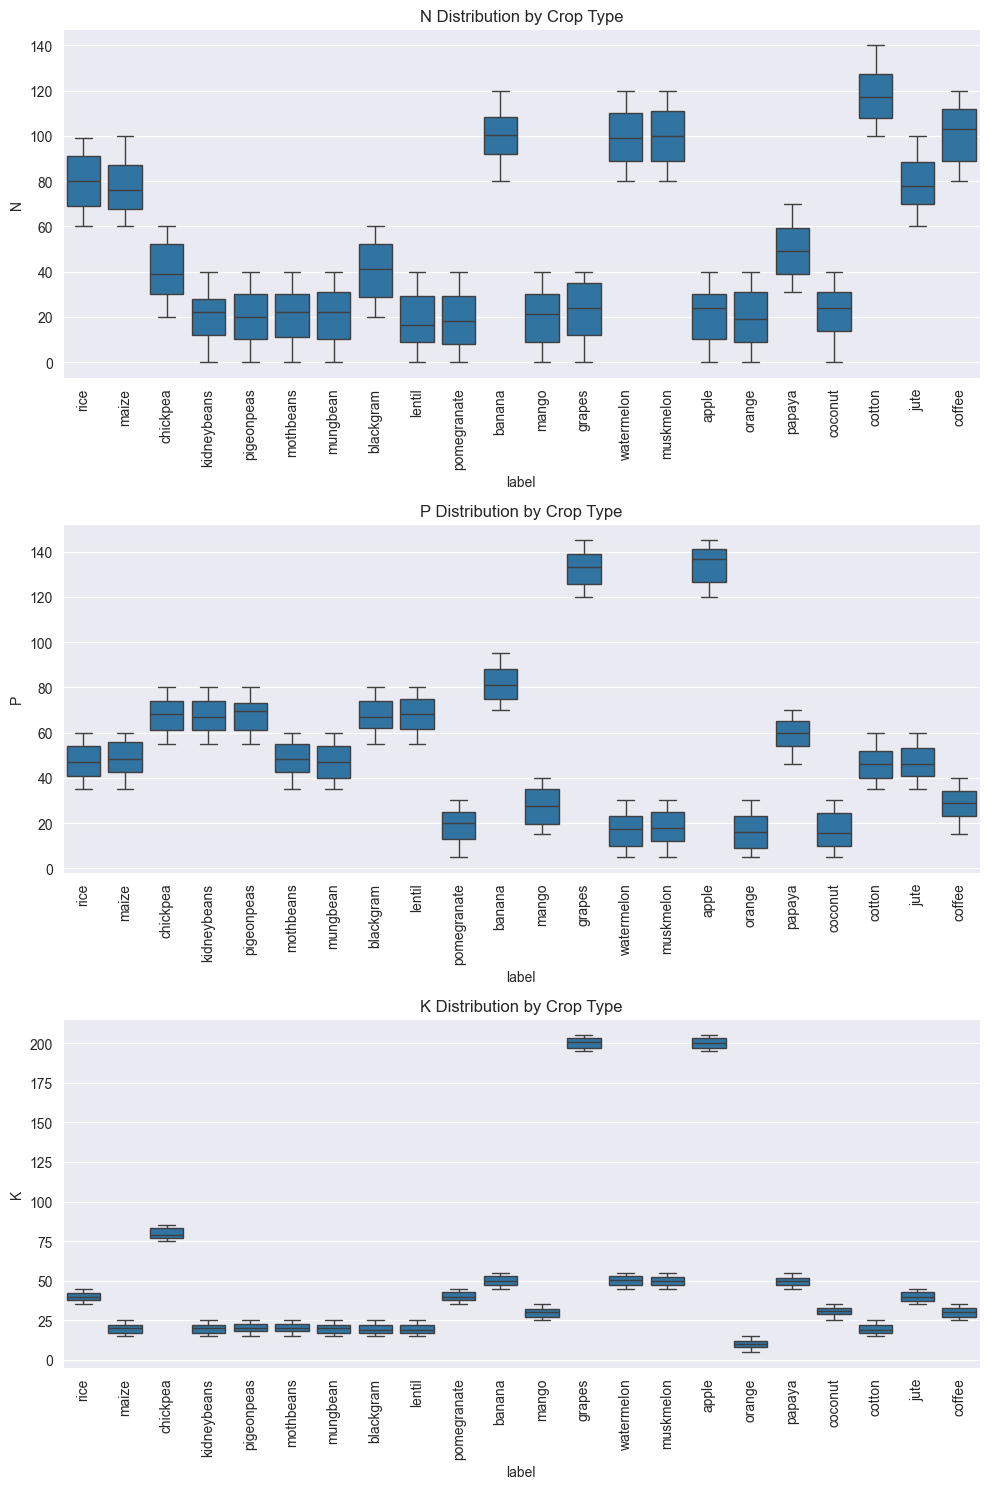

In [4]:
plt.figure(figsize=(10, 15))
for i, nutrient in enumerate(['N', 'P', 'K']):
    plt.subplot(3, 1, i+1)
    sns.boxplot(data=df, x='label', y=nutrient)
    plt.xticks(rotation=90)
    plt.title(f'{nutrient} Distribution by Crop Type')
plt.tight_layout()
plt.show()

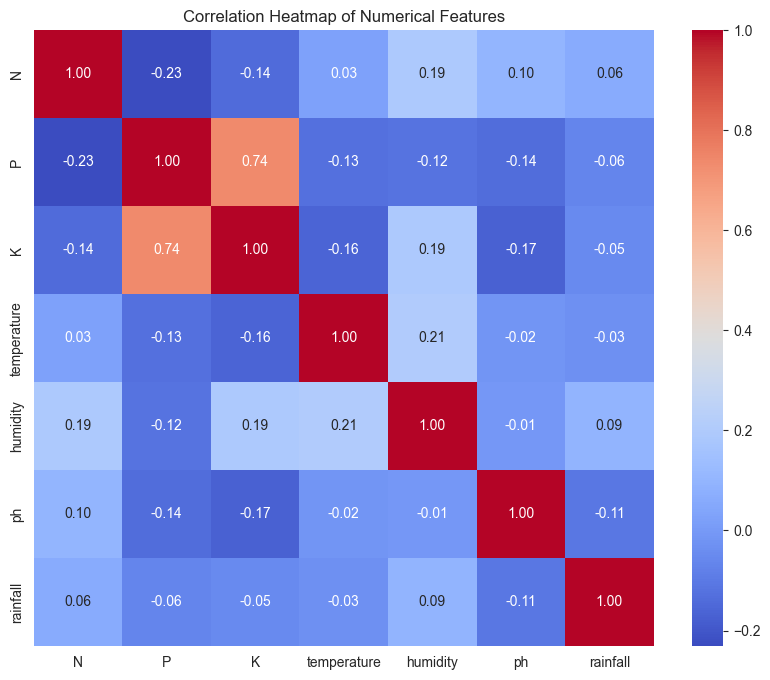

In [5]:
plt.figure(figsize=(10, 8))
corr = df.drop('label', axis=1).corr()  # drop categorical target
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

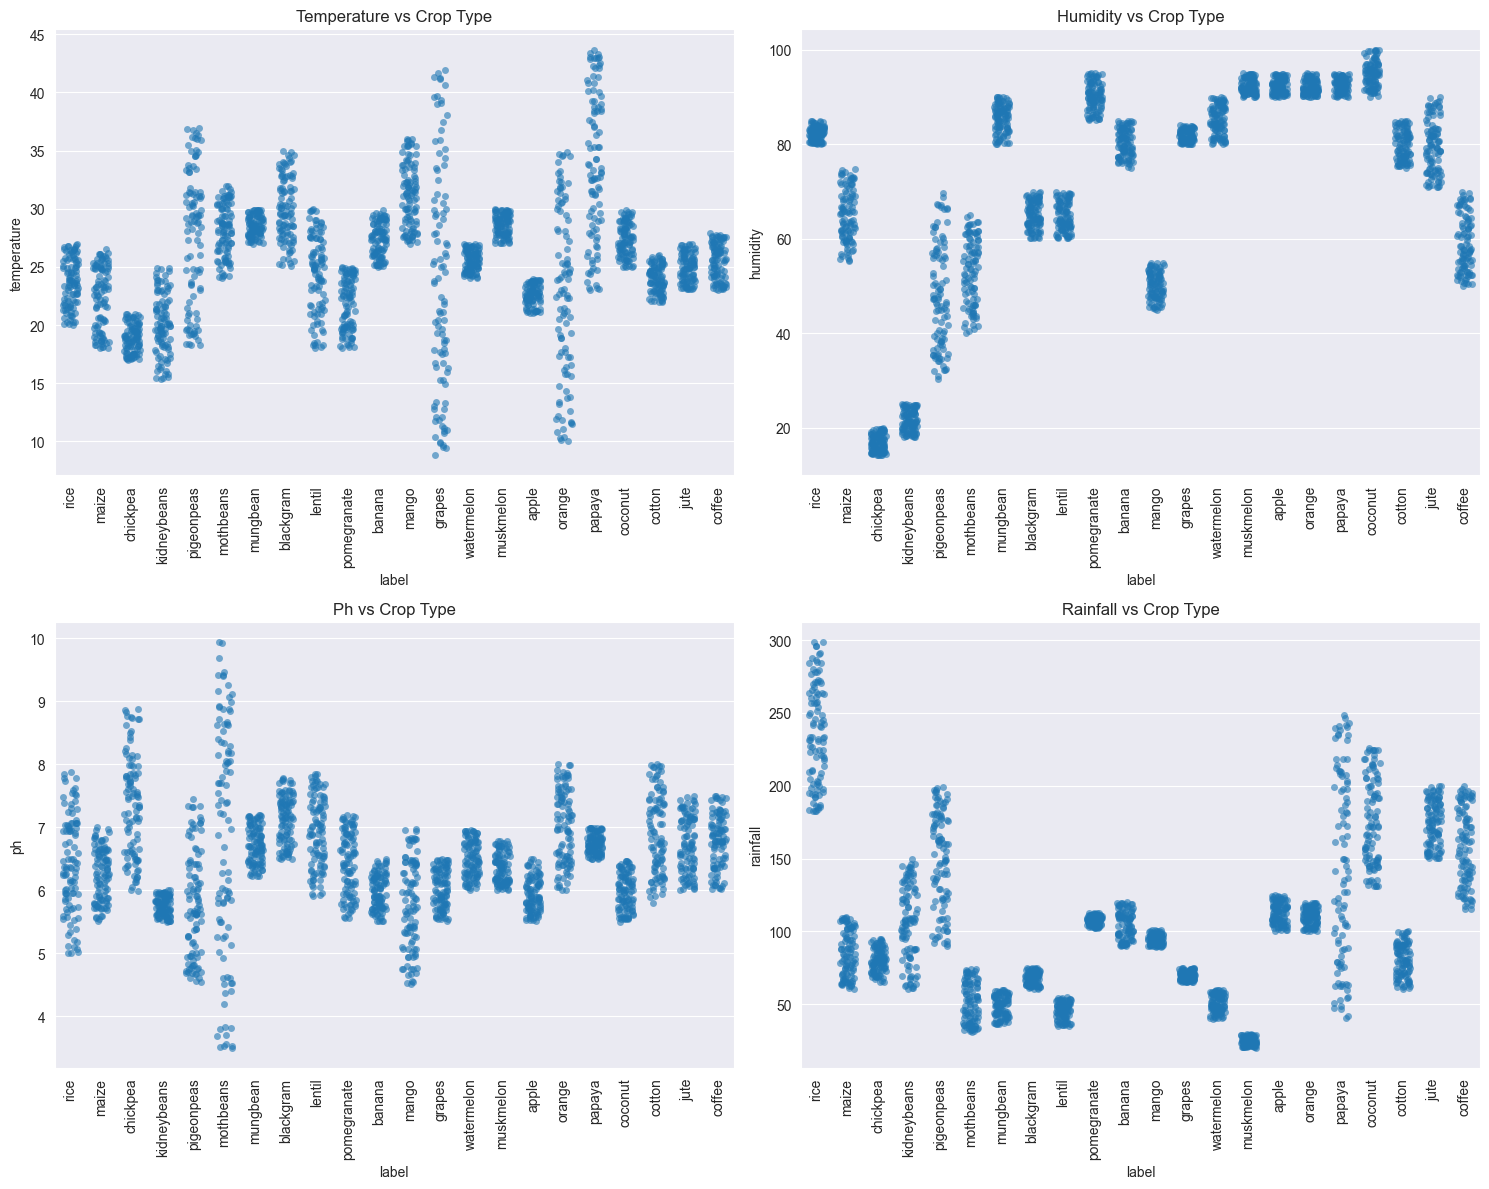

In [6]:
climate_features = ['temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(climate_features):
    plt.subplot(2, 2, i + 1)
    sns.stripplot(data=df, x='label', y=feature, jitter=0.25, alpha=0.6)
    plt.xticks(rotation=90)
    plt.title(f'{feature.capitalize()} vs Crop Type')
plt.tight_layout()
plt.show()

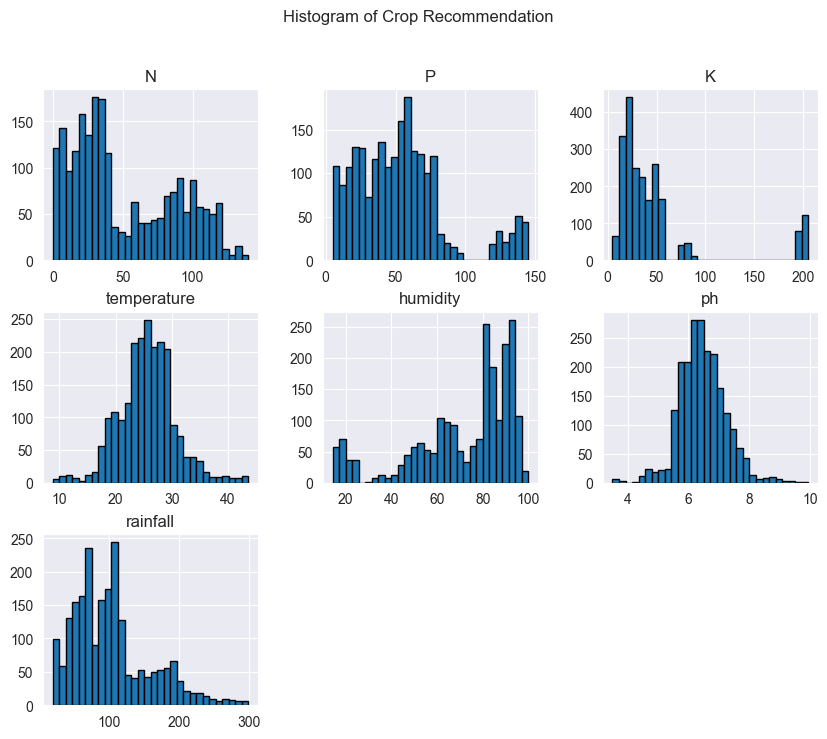

In [7]:
df.hist(bins=30,
        figsize=(10,8),
        edgecolor='black')
plt.suptitle('Histogram of Crop Recommendation')
plt.show()

<Axes: >

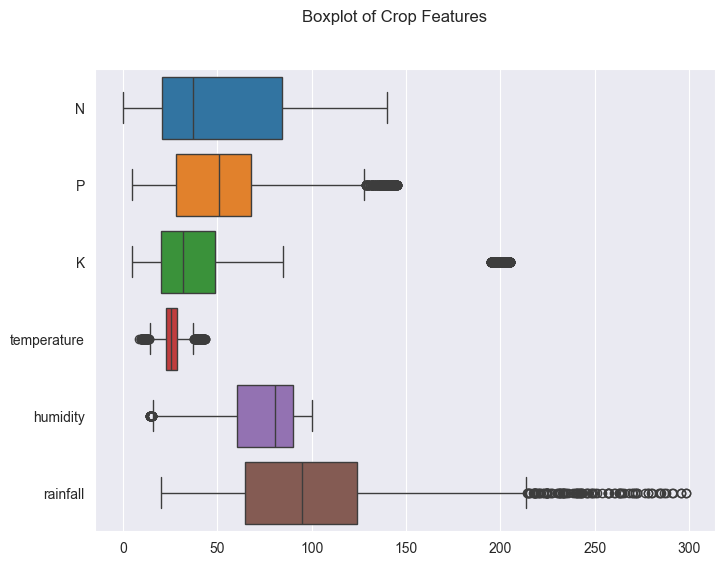

In [9]:
plt.figure(figsize=(8,6))
plt.suptitle('Boxplot of Crop Features')
sns.boxplot(data=df[['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']],orient='h')


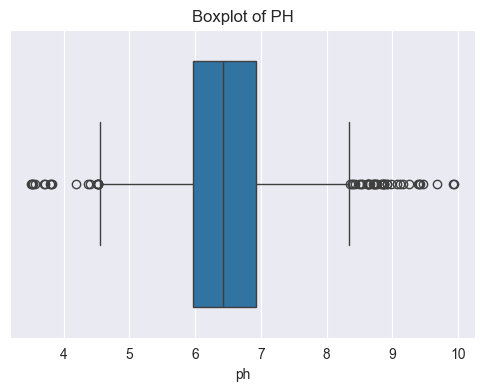

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['ph'])
plt.title(f'Boxplot of PH')
plt.show()

### Feature Engineering

In [11]:
def log_transform(column):
    return np.log1p(column)

df[['K_log','P_log','rainfall_log']] = df[['K','P','rainfall']].apply(log_transform)
engineered_df = df[['N', 'K_log','P_log', 'temperature', 'humidity', 'ph', 'rainfall_log', 'label']]
engineered_df.head()

,N,K_log,P_log,temperature,humidity,ph,rainfall_log,label
0,90,3.784190,3.761200,20.879744,82.002744,6.502985,5.317804,rice
1,85,3.737670,4.077537,21.770462,80.319644,7.038096,5.427834,rice
2,60,3.806662,4.025352,23.004459,82.320763,7.840207,5.579595,rice
3,74,3.713572,3.583519,26.491096,80.158363,6.980401,5.496611,rice
4,78,3.761200,3.761200,20.130175,81.604873,7.628473,5.574878,rice


In [12]:
engineered_df.describe()

,N,K_log,P_log,temperature,humidity,ph,rainfall_log
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,3.577856,3.787273,25.616244,71.481779,6.469480,4.508730
std,36.917334,0.723245,0.699128,5.063749,22.263812,0.773938,0.545400
min,0.000000,1.791759,1.791759,8.825675,14.258040,3.504752,3.054533
25%,21.000000,3.044522,3.367296,22.769375,60.261953,5.971693,4.182839
50%,37.000000,3.496508,3.951244,25.598693,80.473146,6.425045,4.562968
75%,84.250000,3.912023,4.234107,28.561654,89.948771,6.923643,4.830451
max,140.000000,5.327876,4.983607,43.675493,99.981876,9.935091,5.702315


<Axes: >

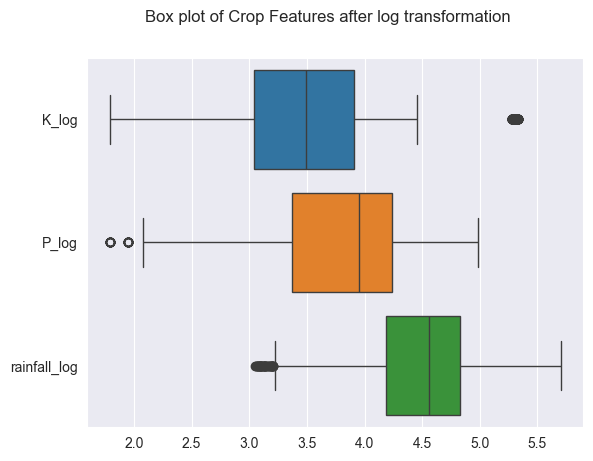

In [13]:
plt.suptitle('Box plot of Crop Features after log transformation')
sns.boxplot(data=df[['K_log','P_log', 'rainfall_log']],orient='h')

<Figure size 600x400 with 0 Axes>

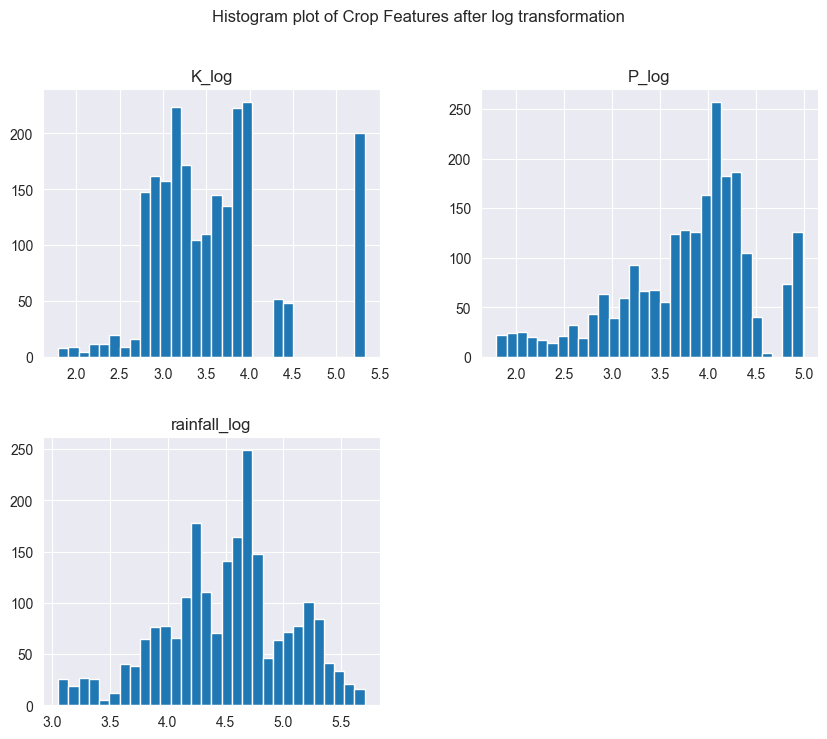

In [14]:
plt.figure(figsize=(6,4))
engineered_df[['K_log','P_log','rainfall_log']].hist(bins=30,figsize=(10,8),edgecolor='white')
plt.suptitle('Histogram plot of Crop Features after log transformation')
plt.show()

In [15]:
bins = np.linspace(0,100,4)
labels = ['low','medium','high']
engineered_df.loc[:,'humidity_band'] = pd.cut(engineered_df['humidity'], bins=bins, labels=labels)

engineered_df = pd.get_dummies(engineered_df, columns=['humidity_band'], drop_first=True, dtype='int')
engineered_df.head()

/var/folders/y0/64_9sbm57sz161hw7vd_xnsm0000gn/T/ipykernel_10609/1985345033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineered_df.loc[:,'humidity_band'] = pd.cut(engineered_df['humidity'], bins=bins, labels=labels)


,N,K_log,P_log,temperature,humidity,ph,rainfall_log,label,humidity_band_medium,humidity_band_high
0,90,3.784190,3.761200,20.879744,82.002744,6.502985,5.317804,rice,0,1
1,85,3.737670,4.077537,21.770462,80.319644,7.038096,5.427834,rice,0,1
2,60,3.806662,4.025352,23.004459,82.320763,7.840207,5.579595,rice,0,1
3,74,3.713572,3.583519,26.491096,80.158363,6.980401,5.496611,rice,0,1
4,78,3.761200,3.761200,20.130175,81.604873,7.628473,5.574878,rice,0,1


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

env_features = engineered_df[['humidity','temperature']]

scaler = StandardScaler()
env_scaled = scaler.fit_transform(env_features)

kmeans = KMeans(n_clusters=3, random_state=0)
engineered_df['env_cluster'] = kmeans.fit_predict(env_features)

<Axes: xlabel='temperature', ylabel='humidity'>

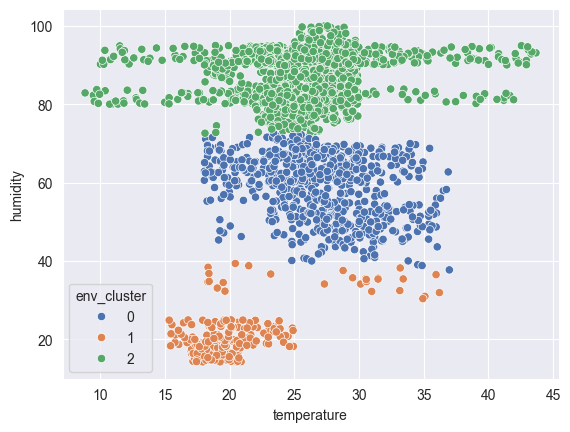

In [17]:
sns.scatterplot(x='temperature',y='humidity',hue='env_cluster',data=engineered_df, palette='deep')

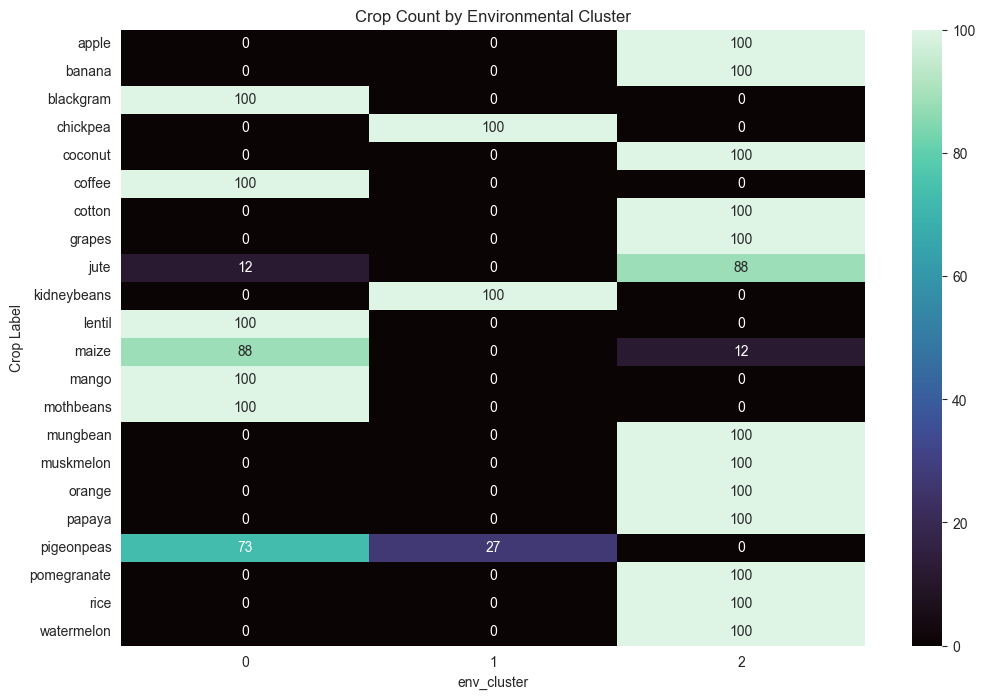

In [18]:
heatmap_data = engineered_df.pivot_table(index='label', columns='env_cluster', aggfunc='size', fill_value=0)
heatmap_data = heatmap_data.sort_values(by='label', ascending=True)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True,cmap='mako', fmt='d')
plt.title("Crop Count by Environmental Cluster")
plt.xlabel("env_cluster")
plt.ylabel("Crop Label")
plt.show()


### The Model

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def build_pipeline(model, scale=False):
    steps = []
    if scale:
        steps.append(('scale', StandardScaler()))
    steps.append(('model', model))
    return Pipeline(steps)